<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Optics/bestFitLineAndSnellsLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Least Square Regression and Snell's Law

To get started we need to import a few libraries. The *numpy* and *matplotlib* libraries are very common, so you may want to commit these lines to memory.

In [1]:
# Import numpy as np
import numpy as np

# Library to plot data
import matplotlib.pyplot as plt

# Import non-linear least squares to fit a function, f, to data.
from scipy.optimize import curve_fit

Broadly speaking, we can say that there are two types of fits:
- polynomial fits (which include linear fits)
- non-linear fits (or more precisely non polynomials).

### Polynomial Fit:

A polynomial fit is a specific type of fit where the relationship between variables is described by a polynomial equation.
The general form of a polynomial fit of degree $n$ with the function is $$ y(x)= a_0 +a_1 x +a_2 x^2 + \cdots + a_n x^n,  $$
where  $y$ is the dependent variable, $x$ is the independent variable, and $a_0, a_1, a_2, \cdots $ are fitting coefficients.
The degree of the polynomial determines the complexity of the curve used to fit the data. A higher-degree polynomial can capture more complex patterns but may also be more prone to overfitting.
It is to be noted that a polynomial of degree $1$ is merely a linear function $$y(x) = a_0 +a_1 x, $$ where $a_0$ is the intercept and $a_1$ is the slope.

### Non-linear Fit (excluding Polynomials):

Non-linear fits, in a broader sense, encompass various mathematical functions that are not necessarily polynomials.
This category includes exponential, logarithmic, sinusoidal, or any other non-linear function that doesn't follow the polynomial form.
Non-linear fits are employed when the relationship between variables cannot be adequately represented by a straight line or a polynomial.
Examples include:
- exponential : $y(x) = a \exp(- \lambda x) $
- logarithmic : $y(x) = a \ln(x) + b $
- sinusoidal : $y(x) = a \sin(bx) +c $

While polynomial fits are a specific type of non-linear fit, non-linear fits more generally include a diverse range of mathematical
functions beyond polynomials.

The choice between these types of fits depends on the specific characteristics of the data and the underlying relationship between the variables.

## Applications to Snell's Law
Snell's Law describes the relationship between the angles of incidence and refraction when light passes through different mediums with different refractive indices. It is expressed as:

$$n_1 \sin(\theta_1) = n_2 \sin(\theta_2), $$
where $n_1$ and $n_2$ are the refractive indices of the first and second mediums, respectively. $\theta_1$​ is the angle of incidence and $\theta_2$  is the angle of refraction.

When dealing with Snell's Law, a linear fit is not typically applied directly, as the relationship involves trigonometric functions (sine). However, one can use linear fitting methods to analyze experimental data by looking at the sine of angles of incidence and refraction. If we consider the angles of incidence to be our independent variables and the angles of refraction to be the dependent variables (our measurements), then we can rewrite the equation as
$$\sin(\theta_2) = \frac{n_1}{n_2} \sin(\theta_1), $$
or
$$ y = m x, $$
where $y = \sin(\theta_2) $, $m= \frac{n_1}{n_2}$ and $x = \sin(\theta_1) $
In this case we have recover a linear function

For the purpose of our analysis, let's record our data in a table format

In [2]:
# Sample data
angles_of_incidence = np.array([0,10,20,30,40])
angles_of_refraction = np.array([0,13,27,41,58.6])

# check that the lengths of the arrays are equal
len(angles_of_incidence) == len( angles_of_refraction)

True

Personally, I am not particular fond of the previous method to keep track of data. I prefer to record the data into a 2D array instead. It is less prone to data entry errors. Since we need two 1D arrays for the best fit line. We can extract the data easily by parsing the 2D array

In [ ]:
# Assuming measurements is your 2D array of shape (n, 2) where the first argument is x and the second is y
measurements = np.array([
    [0, 0],
    [10, 13.3],
    [20,27],
    [30,41.6],
    [40,58.6]
    ])

# Extracting the x and y values into separate 1D arrays
angles_of_incidence = measurements[:, 0]
angles_of_refraction = measurements[:, 1]


We need to convert our data to take the sine of the function. We will use a powerful feature in NumPy called *Broadcasting*, which allows operations to be performed on arrays of different shapes and sizes. This functionality enables you to perform element-wise operations between arrays of different shapes without the need for explicit looping or resizing.

In [3]:
# conversion factor
degrees_to_radians = np.pi/180;

sines_of_incidence = np.sin(angles_of_incidence * degrees_to_radians)
sines_of_refraction = np.sin(angles_of_refraction * degrees_to_radians )

## Method 1:  Using numpy.poly for polynomial fit

To make a polynomial fit, in our case a polynomial of degree 1, we can use the following function

np.polyfit(x, y, deg=1)

it returns the best fit coefficients

Slope: 1.326204042664356, Intercept: -0.002179915899620806


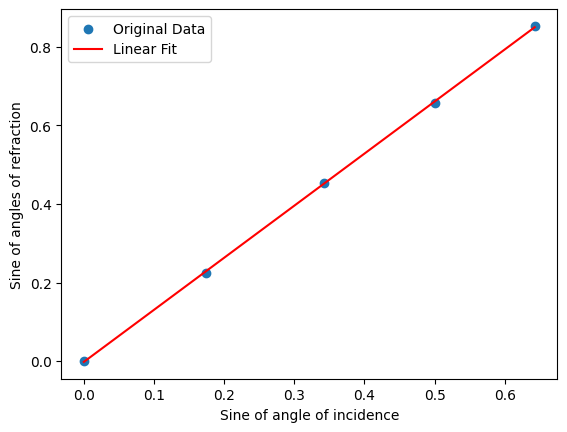

In [4]:
x=sines_of_incidence
y=sines_of_refraction

# Perform linear regression with intercept of zero
coefficients = np.polyfit(x, y, deg=1)

# Get the slope and intercept
slope, intercept = coefficients

# Print the results
print(f"Slope: {slope}, Intercept: {intercept}")

# Create a linear function based on the fit
linear_fit = np.poly1d(coefficients)

# Generate y values based on the linear fit
y_fit = linear_fit(x)

# Plotting the original data and the linear fit
plt.scatter(x, y, label='Original Data')

# plottig the best fit line
plt.plot(x, y_fit, label='Linear Fit', color='red')
plt.xlabel('Sine of angle of incidence')
plt.ylabel('Sine of angles of refraction')
plt.legend()
plt.show()

## Method 2: Using a non_linear method using curve_fit from scipy

In scipy, the curve_fit function is used for non-linear curve fitting. It is a more general method than polyfit and can be used to fit arbitrary functions to data. This function is part of the scipy.optimize module, so you'll need to import it from there.


To call curve_fit, you need to use
params, covariance = curve_fit(model_function, x_data, y_data, initial_guess)

where
- model_function is the function you defined, with the unknown parameters
- x_data and y_data are your independent and dependent variables.
- initial_guess is an initial guess for the parameters of your model (optional)

In [5]:
# Our model function: the first parameter must be the x values, and the one that come after are the parameters to optimize for
# In our case y= mx

def fitRelation( x, m):
    return m * x

In [6]:
# Perform the weighted least squares fit
params, covariance = curve_fit(fitRelation, sines_of_incidence, sines_of_refraction)

# Extract the optimized parameters
n_opt = params

# Calculate the standard deviation of the parameters
n_opt_std_dev = np.sqrt(np.diag(covariance))

In [7]:
# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"n = {n_opt} ± {n_opt_std_dev}")

Optimized parameters:
n = [1.32174241] ± [0.00442078]


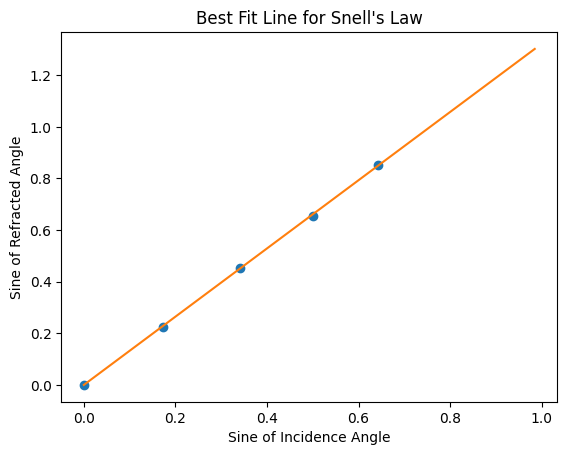

In [8]:
# Plot the data
plt.plot(sines_of_incidence, sines_of_refraction, 'o')

# The best fit line
angles_of_incidence = np.linspace(0, 80, 100)
degrees_to_radians = np.pi/180
theXs = np.sin(angles_of_incidence*degrees_to_radians)
theYs = fitRelation(theXs, n_opt)
plt.plot(theXs, theYs)

# Label the axes and show the plot
plt.xlabel('Sine of Incidence Angle')
plt.ylabel('Sine of Refracted Angle')
plt.title('Best Fit Line for Snell\'s Law')
plt.show()